 ### Airbnb Price Estimate
Bu veri seti ile New York City'deki Airbnb ilanlarının fiyatlarını tahmin etmeye çalışacağız. Amacımız, bir evi kiralamak isteyen birinin fiyatının ne olacağını öngörmek. Bunun için Regresyon, Karar Ağacı ve Random Forest modelleri uygulayacağız.

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


id – Airbnb ilanının benzersiz kimlik numarası.

name – İlanın adı veya açıklaması.

host_id – İlan sahibinin benzersiz kimlik numarası.

host_name – İlan sahibinin adı.

neighbourhood_group – İlanın bulunduğu büyük bölge (örneğin Manhattan, Brooklyn).

neighbourhood – İlanın bulunduğu mahalle.

latitude – İlanın enlem (latitude) koordinatı.

longitude – İlanın boylam (longitude) koordinatı.

room_type – Konaklama türü (Örneğin: "Private room" (Özel oda), "Entire home/apt" (Tüm ev/daire), "Shared room" (Paylaşılan oda)).

price – Gecelik konaklama ücreti (USD cinsinden).

minimum_nights – Konaklama için belirlenen minimum gece sayısı.

number_of_reviews – İlanın aldığı toplam inceleme sayısı.

last_review – İlanın son inceleme tarihi.

reviews_per_month – Aylık ortalama inceleme sayısı.

calculated_host_listings_count – Aynı ev sahibinin toplam ilan sayısı.

availability_365 – Yıl boyunca müsait olduğu gün sayısı (365 gün üzerinden).

In [5]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.drop(columns=["id","name","host_id","host_name","last_review"],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [11]:
print("Mean (Ortalama):", df["reviews_per_month"].mean())
print("Median (Ortanca):", df["reviews_per_month"].median())



Mean (Ortalama): 1.3732214298586618
Median (Ortanca): 0.72


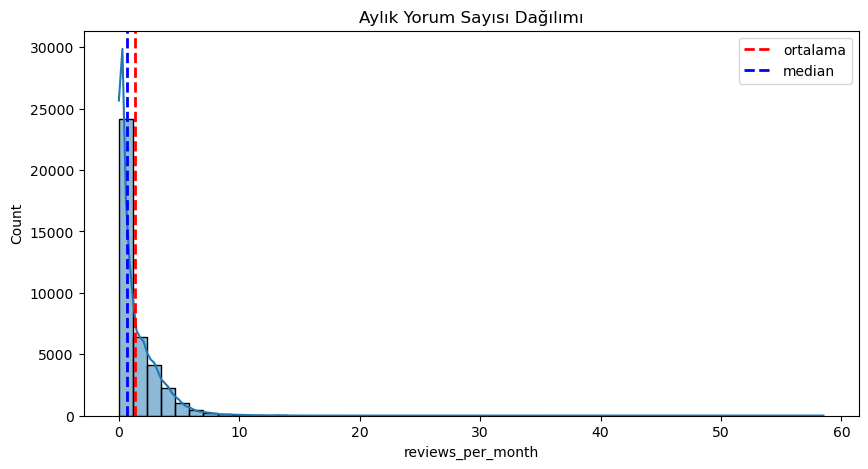

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df["reviews_per_month"], bins=50, kde=True)
plt.axvline(df["reviews_per_month"].mean(), color='red', linestyle='dashed', linewidth=2, label="ortalama")
plt.axvline(df["reviews_per_month"].median(), color='blue', linestyle='dashed', linewidth=2, label="median")
plt.legend()
plt.title("Aylık Yorum Sayısı Dağılımı")
plt.show()

daha fazla yorum sayısına sahip ilan ortalamayı yukarı çekiyor.Burda çarpıklığı azaltmam gerekiyor.Dagılımı dengeli hale getrirelim.

In [14]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
df["reviews_per_month"] = power_transformer.fit_transform(df[["reviews_per_month"]])


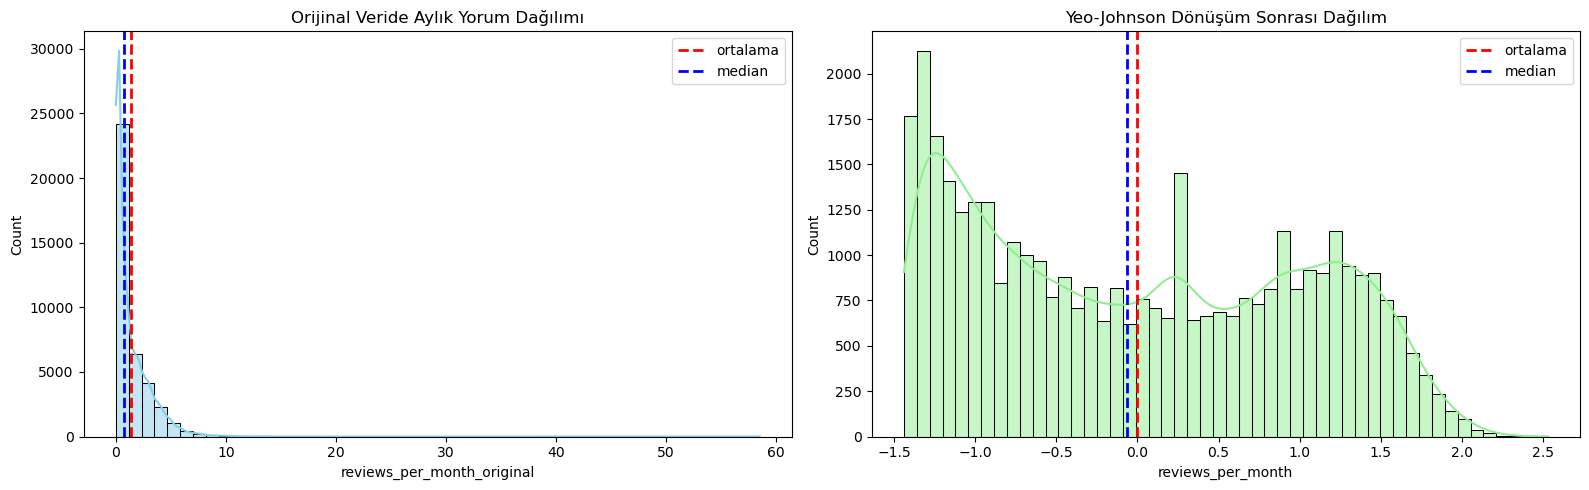

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

df["reviews_per_month_original"] = power_transformer.inverse_transform(df[["reviews_per_month"]])
sns.histplot(df["reviews_per_month_original"], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(df["reviews_per_month_original"].mean(), color='red', linestyle='dashed', linewidth=2, label="ortalama")
axes[0].axvline(df["reviews_per_month_original"].median(), color='blue', linestyle='dashed', linewidth=2, label="median")
axes[0].set_title("Orijinal Veride Aylık Yorum Dağılımı")
axes[0].legend()

# 2. Dönüştürülmüş Dağılım (Yeo-Johnson)
sns.histplot(df["reviews_per_month"], bins=50, kde=True, ax=axes[1], color='lightgreen')
axes[1].axvline(df["reviews_per_month"].mean(), color='red', linestyle='dashed', linewidth=2, label="ortalama")
axes[1].axvline(df["reviews_per_month"].median(), color='blue', linestyle='dashed', linewidth=2, label="median")
axes[1].set_title("Yeo-Johnson Dönüşüm Sonrası Dağılım")
axes[1].legend()

plt.tight_layout()
plt.show()


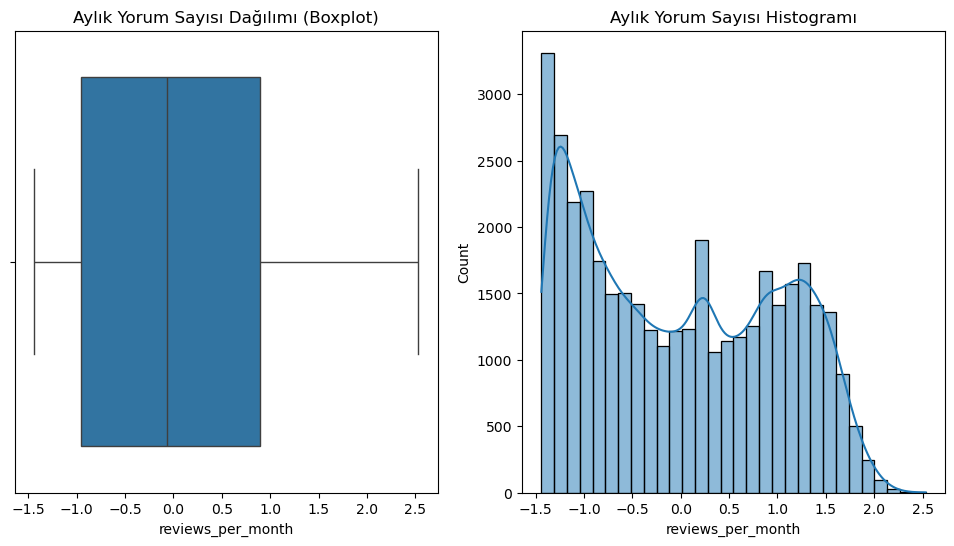

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Kutu grafiği
plt.subplot(1, 2, 1)
sns.boxplot(x=df["reviews_per_month"])
plt.title("Aylık Yorum Sayısı Dağılımı (Boxplot)")

# Histogram (Dağılım Grafiği)
plt.subplot(1, 2, 2)
sns.histplot(df["reviews_per_month"], bins=30, kde=True)
plt.title("Aylık Yorum Sayısı Histogramı")

plt.show()


✔ Çünkü veri uç değerler içeriyor ve çarpık bir dağılım gösteriyor.
✔ Çoğu ilan çok az yorum alırken, birkaç ilan çok fazla yorum alıyor.
✔ mean() kullanırsak, az yorum alan ilanlar için yanlış tahmin yapabiliriz.

In [18]:
df["reviews_per_month"].isnull().sum() 

10052

In [19]:
df["reviews_per_month"] = df["reviews_per_month"].astype(float)  # Sayısal tipe çevir

# Neighbourhood + Room Type bazında median ile doldur
df["reviews_per_month"] = df.groupby(["neighbourhood", "room_type"])["reviews_per_month"].transform(lambda x: x.fillna(x.median()))

#  Eğer hâlâ boş kalan varsa, mahalle bazında median ile doldur
df["reviews_per_month"] = df.groupby("neighbourhood")["reviews_per_month"].transform(lambda x: x.fillna(x.median()))

# Hâlâ boşluk varsa, en son 0 ile tamamla
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# Eksik veri kalıp kalmadığını kontrol et
print(df["reviews_per_month"].isnull().sum())  # Eğer 0 ise, artık eksik değer yok!




0


In [20]:
print(df["reviews_per_month"].isnull().sum())  # Eğer 0 ise, tüm eksik veriler temizlenmiş demektir.


0


In [21]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
reviews_per_month_original        10052
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
 11  reviews_per_month_original      38843 non-null  float64
dtypes: float64(4), int64(5), object(

In [23]:
df = pd.get_dummies(df, columns=["neighbourhood_group", "room_type"], drop_first=True)


In [24]:
df["neighbourhood_encoded"] = df.groupby("neighbourhood")["price"].transform("mean")
df.drop(columns=["neighbourhood"], inplace=True)


In [25]:
print(df.dtypes)


latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
reviews_per_month_original           float64
neighbourhood_group_Brooklyn            bool
neighbourhood_group_Manhattan           bool
neighbourhood_group_Queens              bool
neighbourhood_group_Staten Island       bool
room_type_Private room                  bool
room_type_Shared room                   bool
neighbourhood_encoded                float64
dtype: object


In [26]:
df = df[df["price"] > 0]
df["log_price"] = np.log1p(df["price"])


In [27]:
df["minimum_nights_log"] = np.log1p(df["minimum_nights"])
df["review_score"] = df["reviews_per_month"] * df["number_of_reviews"]


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns=["price"])  # X: Fiyat dışındaki tüm değişkenler (Özellikler) # bagımsızz degişkenler
y = df["price"]  # y: Fiyat (Modelin tahmin etmeye çalıştığı değer)
 #baglımlı degişken y 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train = X_train.drop(columns=["reviews_per_month_original"], errors="ignore")
X_test = X_test.drop(columns=["reviews_per_month_original"], errors="ignore")


In [32]:
X_train.isnull().sum()


latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
neighbourhood_encoded                0
log_price                            0
minimum_nights_log                   0
review_score                         0
dtype: int64

In [33]:
#Ml algoritmaları CPU'da çalışır.
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)  # Test seti üzerinde tahmin yap


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error(MSE): {mse}")

Mean Absolute Error (MAE): 64.33956195536871
Root Mean Squared Error (RMSE): 134.60135869462852
Mean Squared Error(MSE): 18117.525762440044


In [36]:
print(df["price"].describe())


count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


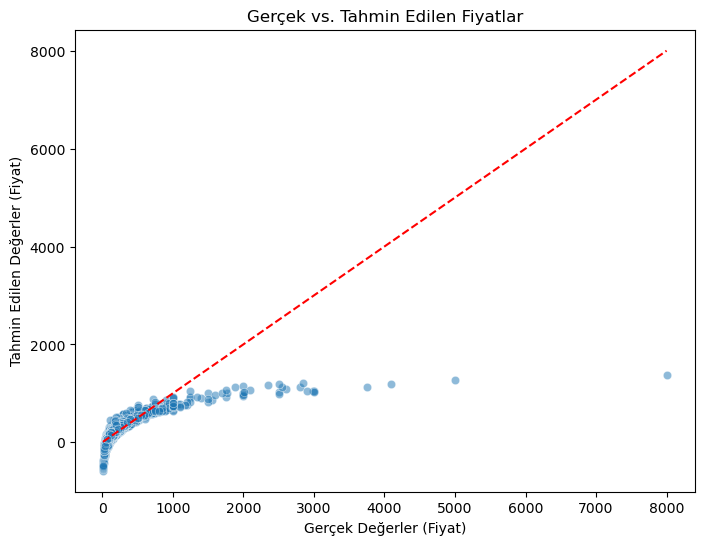

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)  # Gerçek ve tahmin edilen değerleri karşılaştır
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Doğru tahmin çizgisi
plt.xlabel("Gerçek Değerler (Fiyat)")
plt.ylabel("Tahmin Edilen Değerler (Fiyat)")
plt.title("Gerçek vs. Tahmin Edilen Fiyatlar")
plt.show()


In [38]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [39]:
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [40]:
y_pred =model.predict(X_test)

Text(0.5, 1.0, 'Decission Tree')

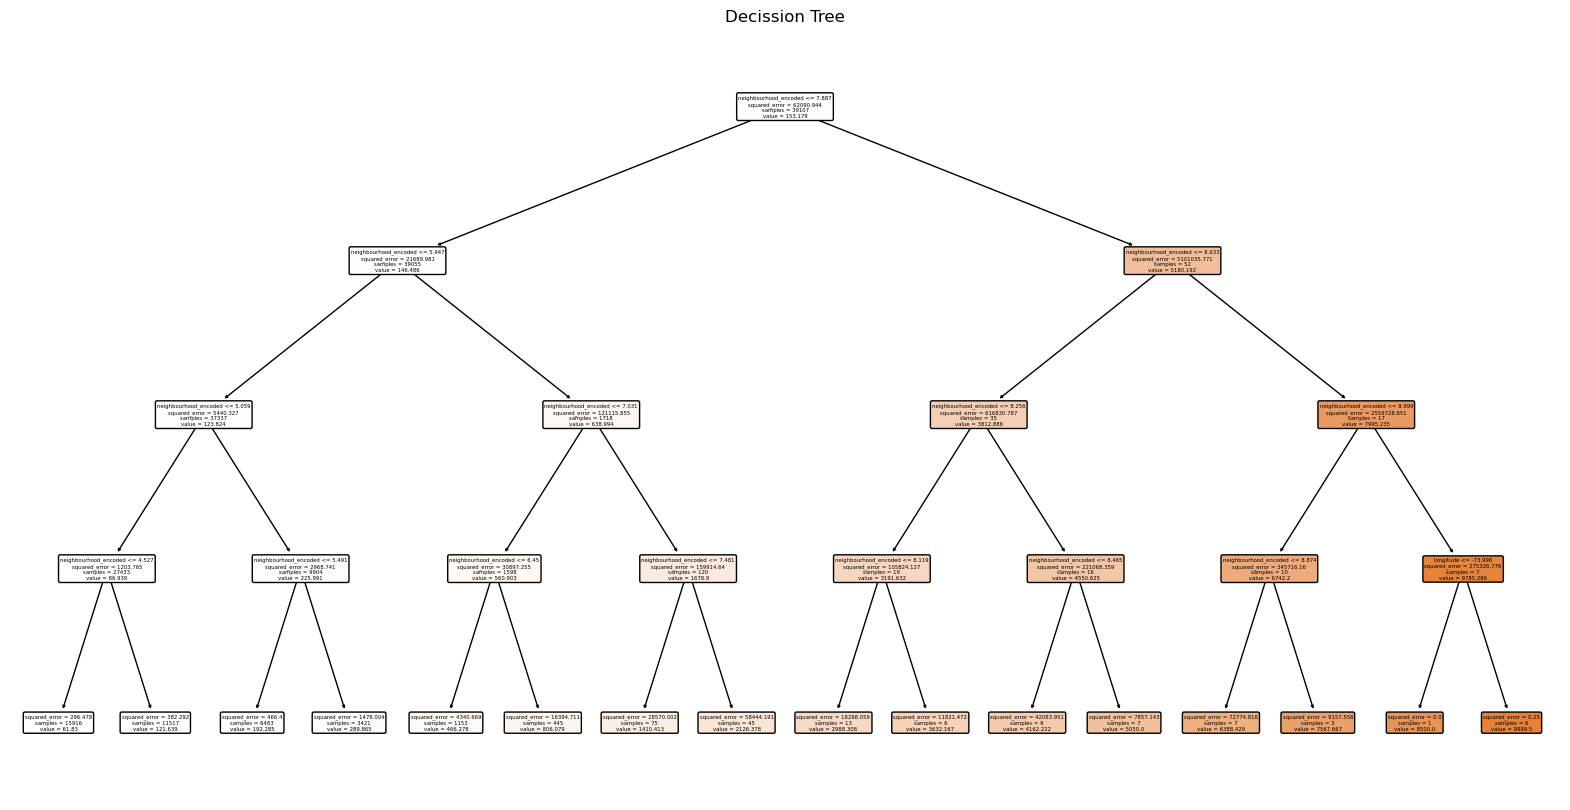

In [41]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=X.columns,filled=True,rounded =True)
plt.title("Decission Tree")# renk koyulaştıkça value degeri artar çıktıdaki renk karar agacındaki

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) # 1 e yakınlık -->daha iyi  
mae,mse,r2

(20.44772308477069, 993.8197591476187, 0.9751768153378988)

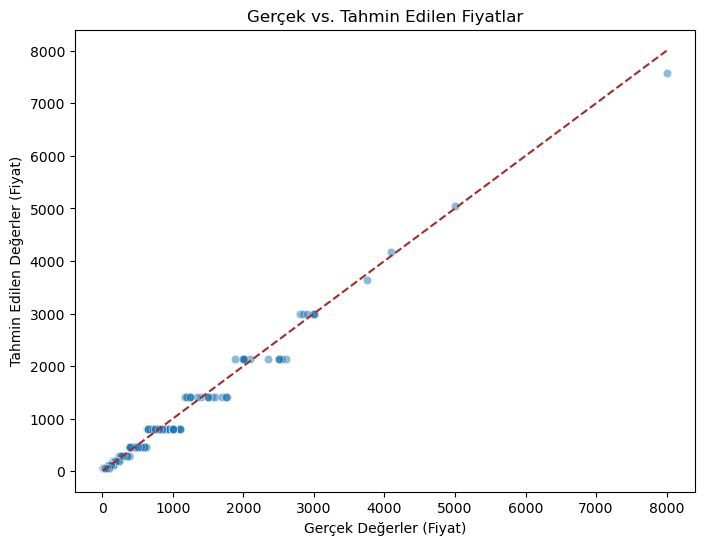

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)  # Gerçek ve tahmin edilen değerleri karşılaştır
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="brown", linestyle="--")  # Doğru tahmin çizgisi
plt.xlabel("Gerçek Değerler (Fiyat)")
plt.ylabel("Tahmin Edilen Değerler (Fiyat)")
plt.title("Gerçek vs. Tahmin Edilen Fiyatlar")
plt.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model2= RandomForestRegressor(n_estimators=100,random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred2 =model2.predict(X_test)

In [48]:
mse= mean_squared_error(y_test,y_pred2)
mae= mean_absolute_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2) # 1 e yakınlık -->daha iyi  
mae,mse,r2

(0.08162626572568259, 3.793267198527154, 0.9999052534714922)

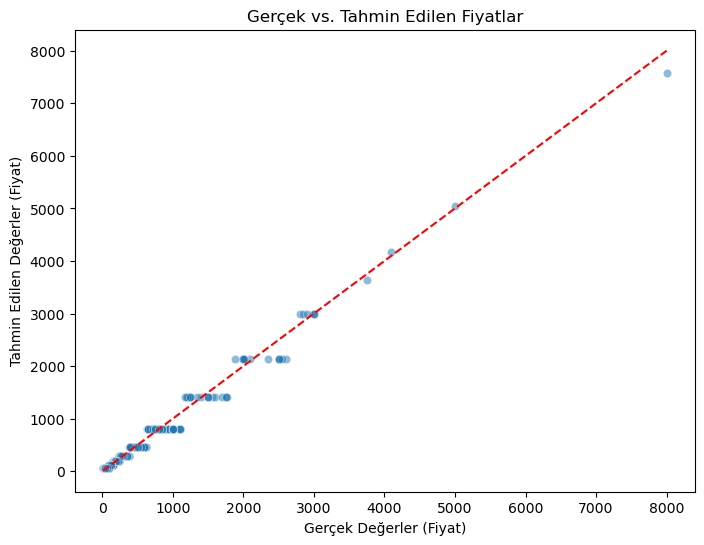

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)  # Gerçek ve tahmin edilen değerleri karşılaştır
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Doğru tahmin çizgisi
plt.xlabel("Gerçek Değerler (Fiyat)")
plt.ylabel("Tahmin Edilen Değerler (Fiyat)")
plt.title("Gerçek vs. Tahmin Edilen Fiyatlar")
plt.show()

In [50]:
# Recreate the original 'neighbourhood_group' column
df['neighbourhood_group'] = df[['neighbourhood_group_Brooklyn', 
                                'neighbourhood_group_Manhattan',
                                'neighbourhood_group_Queens',
                                'neighbourhood_group_Staten Island']].idxmax(axis=1)

# Strip the prefix so it becomes just the group name
df['neighbourhood_group'] = df['neighbourhood_group'].str.replace('neighbourhood_group_', '')



Text(0.5, 1.0, 'Neighbourhood Group Location')

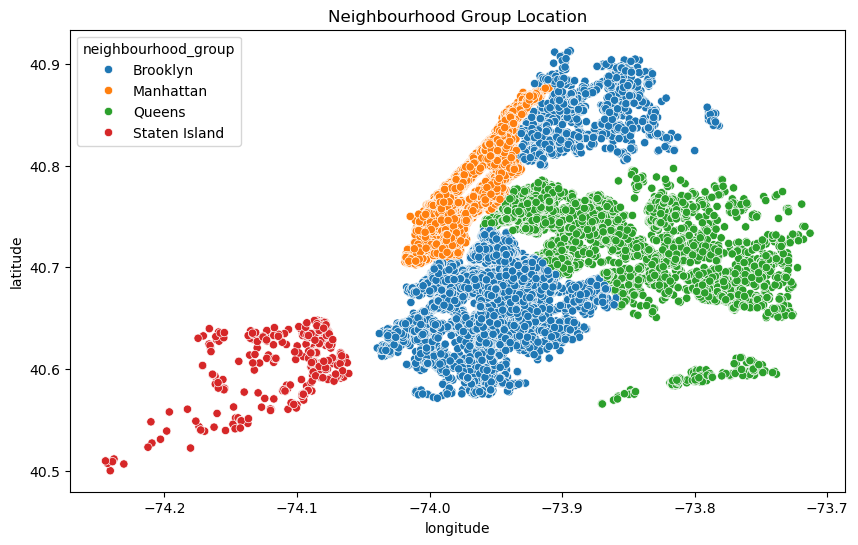

In [51]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group).set_title(title)


In [52]:
# Recreate the original 'room_type' column from one-hot encoded columns
df['room_type'] = df[['room_type_Private room', 'room_type_Shared room']].idxmax(axis=1)

# Clean up the column name
df['room_type'] = df['room_type'].str.replace('room_type_', '')


Text(0.5, 1.0, 'Room type location per Neighbourhood Group')

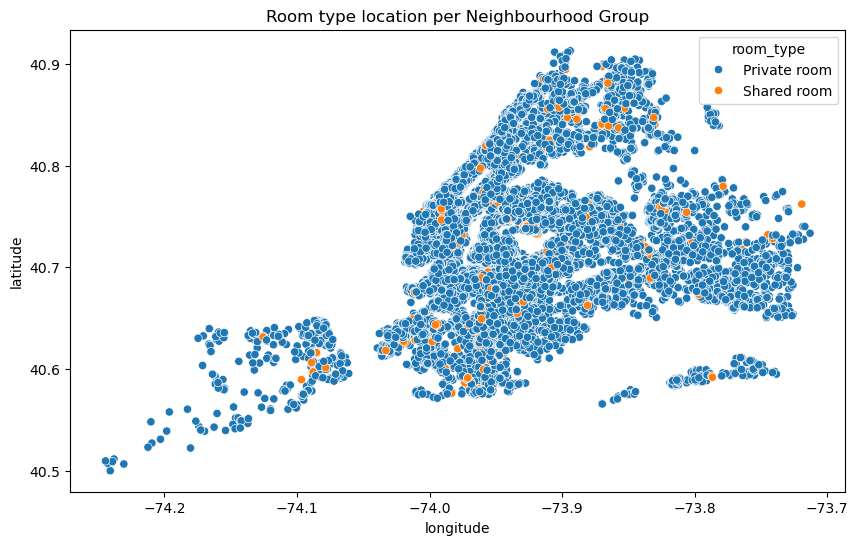

In [53]:
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type).set_title(title)


In [54]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium.plugins import FastMarkerCluster
import folium.plugins as plugins

In [ ]:
import folium
from folium.plugins import HeatMap

# Haritayı oluştur
map_1 = folium.Map(location=[40.76586, -73.98436], tiles='cartodbpositron', zoom_start=11)

# HeatMap oluştur
HeatMap(data=df[['latitude', 'longitude']], radius=10).add_to(map_1)

# Haritayı göster
map_1


In [56]:
df["All"] = 'Room type: ' + df['room_type'].astype(str) + ', ' + \
            'Availability (365 days): ' + df["availability_365"].astype(str) + ', ' + \
            'Price: $' + df["price"].astype(str)


In [ ]:
import folium
from folium import plugins

# Harita figürü oluştur
f = folium.Figure(width=1200, height=750)
map = folium.Map(location=[40.76586, -73.98436], zoom_start=11).add_to(f)

# MarkerCluster grubu
price = plugins.MarkerCluster().add_to(map)

# Doğru veri çerçevesi: df
for latitude, longitude, label in zip(df.latitude, df.longitude, df.All):
    folium.Marker(
        location=[latitude, longitude],
        icon=None,
        popup=label
    ).add_to(price)

# Haritaya ekle
map.add_child(price)
map
